# PREDICTION MODEL

### Definition:
#### Prediction algorithms are used to forecast future events based on historical data.

<img src="Prediction.png" alt="prediction image" title="Prediction" />

### Car Price Prediction Data

### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.The company wants to know:

Which variables are significant in predicting the price of a car, how well those variables describe the price of a car.

### Business Goal:
We are required to model the price of cars with the available independent variables so that the company can accordingly manipulate the design of the cars, the business strategy etc; to meet certain price levels based on the fitted model.
Here we do this by applying Linear Regression model.

### Description of Dataset:
The dataset contains information regarding the various factors influencing the price of a particular car.There are a total of 26 columns/attributes like carname,fueltype,enginelocation,horsepower,peakrpm,citympg etc also with the output variable/attribute price.There are a total of 205 observations. 

In [1]:
# Importing necessary packages and functions required
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
%matplotlib inline 
# for matplotlib graphs to be included in the notebook, next to the code
import seaborn as sns # for visualization 
import warnings # to silence warnings
warnings.filterwarnings('ignore')

In [2]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')

In [3]:
# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
# Reading the automobile consulting company file on which analysis needs to be done
df_auto = pd.read_csv("D:\\20-6-19\\PROJECTS\\CAR PRICE PREDICTION\\CarPrice_Assignment.csv")
df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


#### Understanding the shape of the dataframe

In [5]:
df_auto.shape

(205, 26)

This shows that there are 205 rows, 26 columns in the data.

In [6]:
# information of the dataset
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
# summary statistics of dataset
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


### Cleaning the Data

### What is Data Cleaning ? :
Data comes in all forms, most of it being very messy and unstructured. They rarely come ready to use. Datasets, large and small, come with a variety of issues- invalid fields, missing and additional values, and values that are in forms different from the one we require. In order to bring it to workable or structured form, we need to “clean” our data, and make it ready to use. Some common cleaning includes parsing, converting to one-hot, removing unnecessary data, etc.

<img src="cleanvsuncleandata.png" alt="clean vs unclean image" title="Cleaning methods" />

We need to do some basic cleansing activity in order to feed our model the correct data.

In [8]:
# Dropping car_ID as it is just for reference and is of no use.
df_auto = df_auto.drop('car_ID',axis=1)

In [9]:
# Missing Values % contribution in DF
df_null = df_auto.isna().mean().round(4) * 100
df_null.sort_values(ascending=False)

price              0.0000
carheight          0.0000
CarName            0.0000
fueltype           0.0000
aspiration         0.0000
doornumber         0.0000
carbody            0.0000
drivewheel         0.0000
enginelocation     0.0000
wheelbase          0.0000
carlength          0.0000
carwidth           0.0000
curbweight         0.0000
highwaympg         0.0000
enginetype         0.0000
cylindernumber     0.0000
enginesize         0.0000
fuelsystem         0.0000
boreratio          0.0000
stroke             0.0000
compressionratio   0.0000
horsepower         0.0000
peakrpm            0.0000
citympg            0.0000
symboling          0.0000
dtype: float64

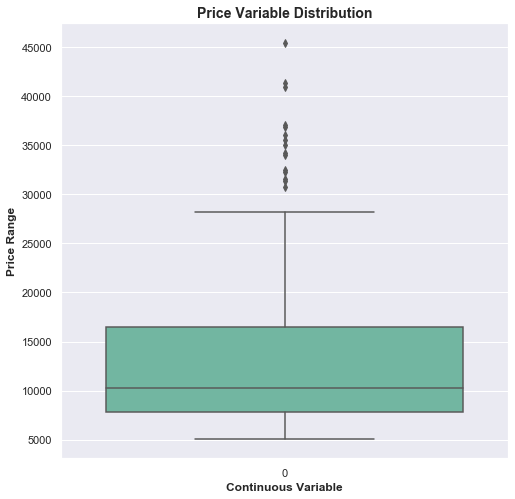

In [10]:
# Outlier Analysis of target variable
plt.figure(figsize = [8,8])
sns.boxplot(data=df_auto['price'], orient="v", palette="Set2")
plt.title("Price Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
plt.show()

Insight:
There are some car prices whose values are above 30,000 which can be termed as outliers but we will not remove them instead we will use standarization scaling.

In [11]:
# Extracting Car Company from the CarName  
df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [12]:
df_auto.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [13]:
# Checking for Unique Car companies 
df_auto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We find that in car company names there are some typing mistakes which we will rename correctly as follows:\
maxda = mazda\
Nissan = nissan\
porsche = porcshce\
toyota = toyouta\
vokswagen = volkswagen = vw

In [14]:
# Renaming the typing errors in Car Company names
df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [15]:
# changing the datatype of symboling from integer to string as it is categorical variable as per the dictionary file
df_auto['symboling'] = df_auto['symboling'].astype(str)

In [16]:
# To check if there are duplicates present in the dataset
df_auto.loc[df_auto.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [17]:
# Segregation/Seperation of Numerical and Categorical Variables/Columns in the dataset
cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

In [18]:
df_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [19]:
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [20]:
print(df_cat.shape)
print(df_num.shape)

(205, 11)
(205, 14)


### Visualising the Data

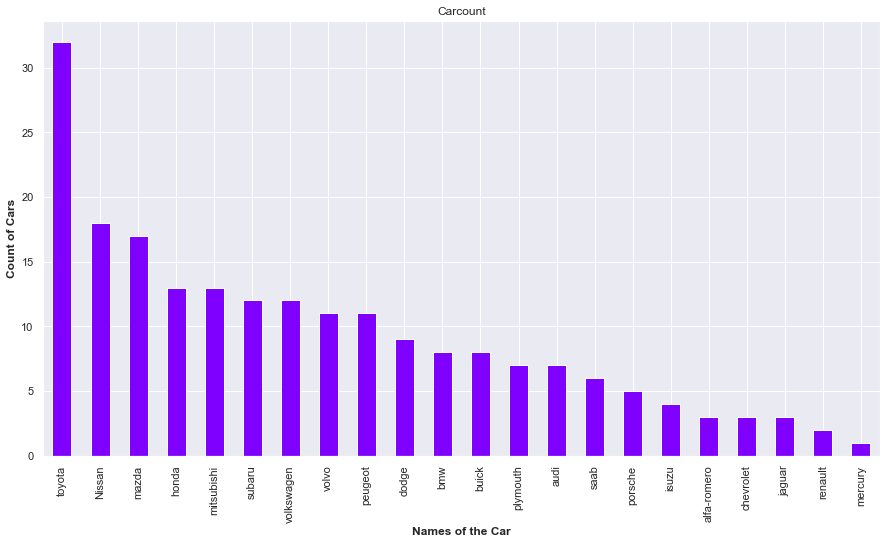

In [21]:
# Visualizing number of cars for each car name in the dataset
plt.figure(figsize = [15,8])
ax=df_auto['CarName'].value_counts().plot(kind='bar',stacked=False, colormap = 'rainbow')
ax.title.set_text('Carcount')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

Toyota seems to be the most favoured cars, whereas Mercury seems to be the least favoured cars.

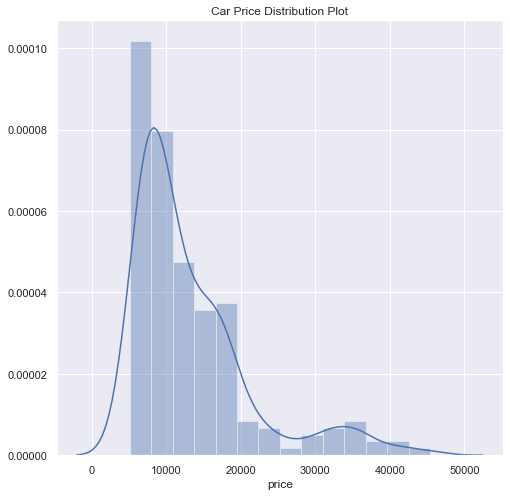

In [22]:
# Visualizing the distribution of car prices
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])
plt.show()

The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

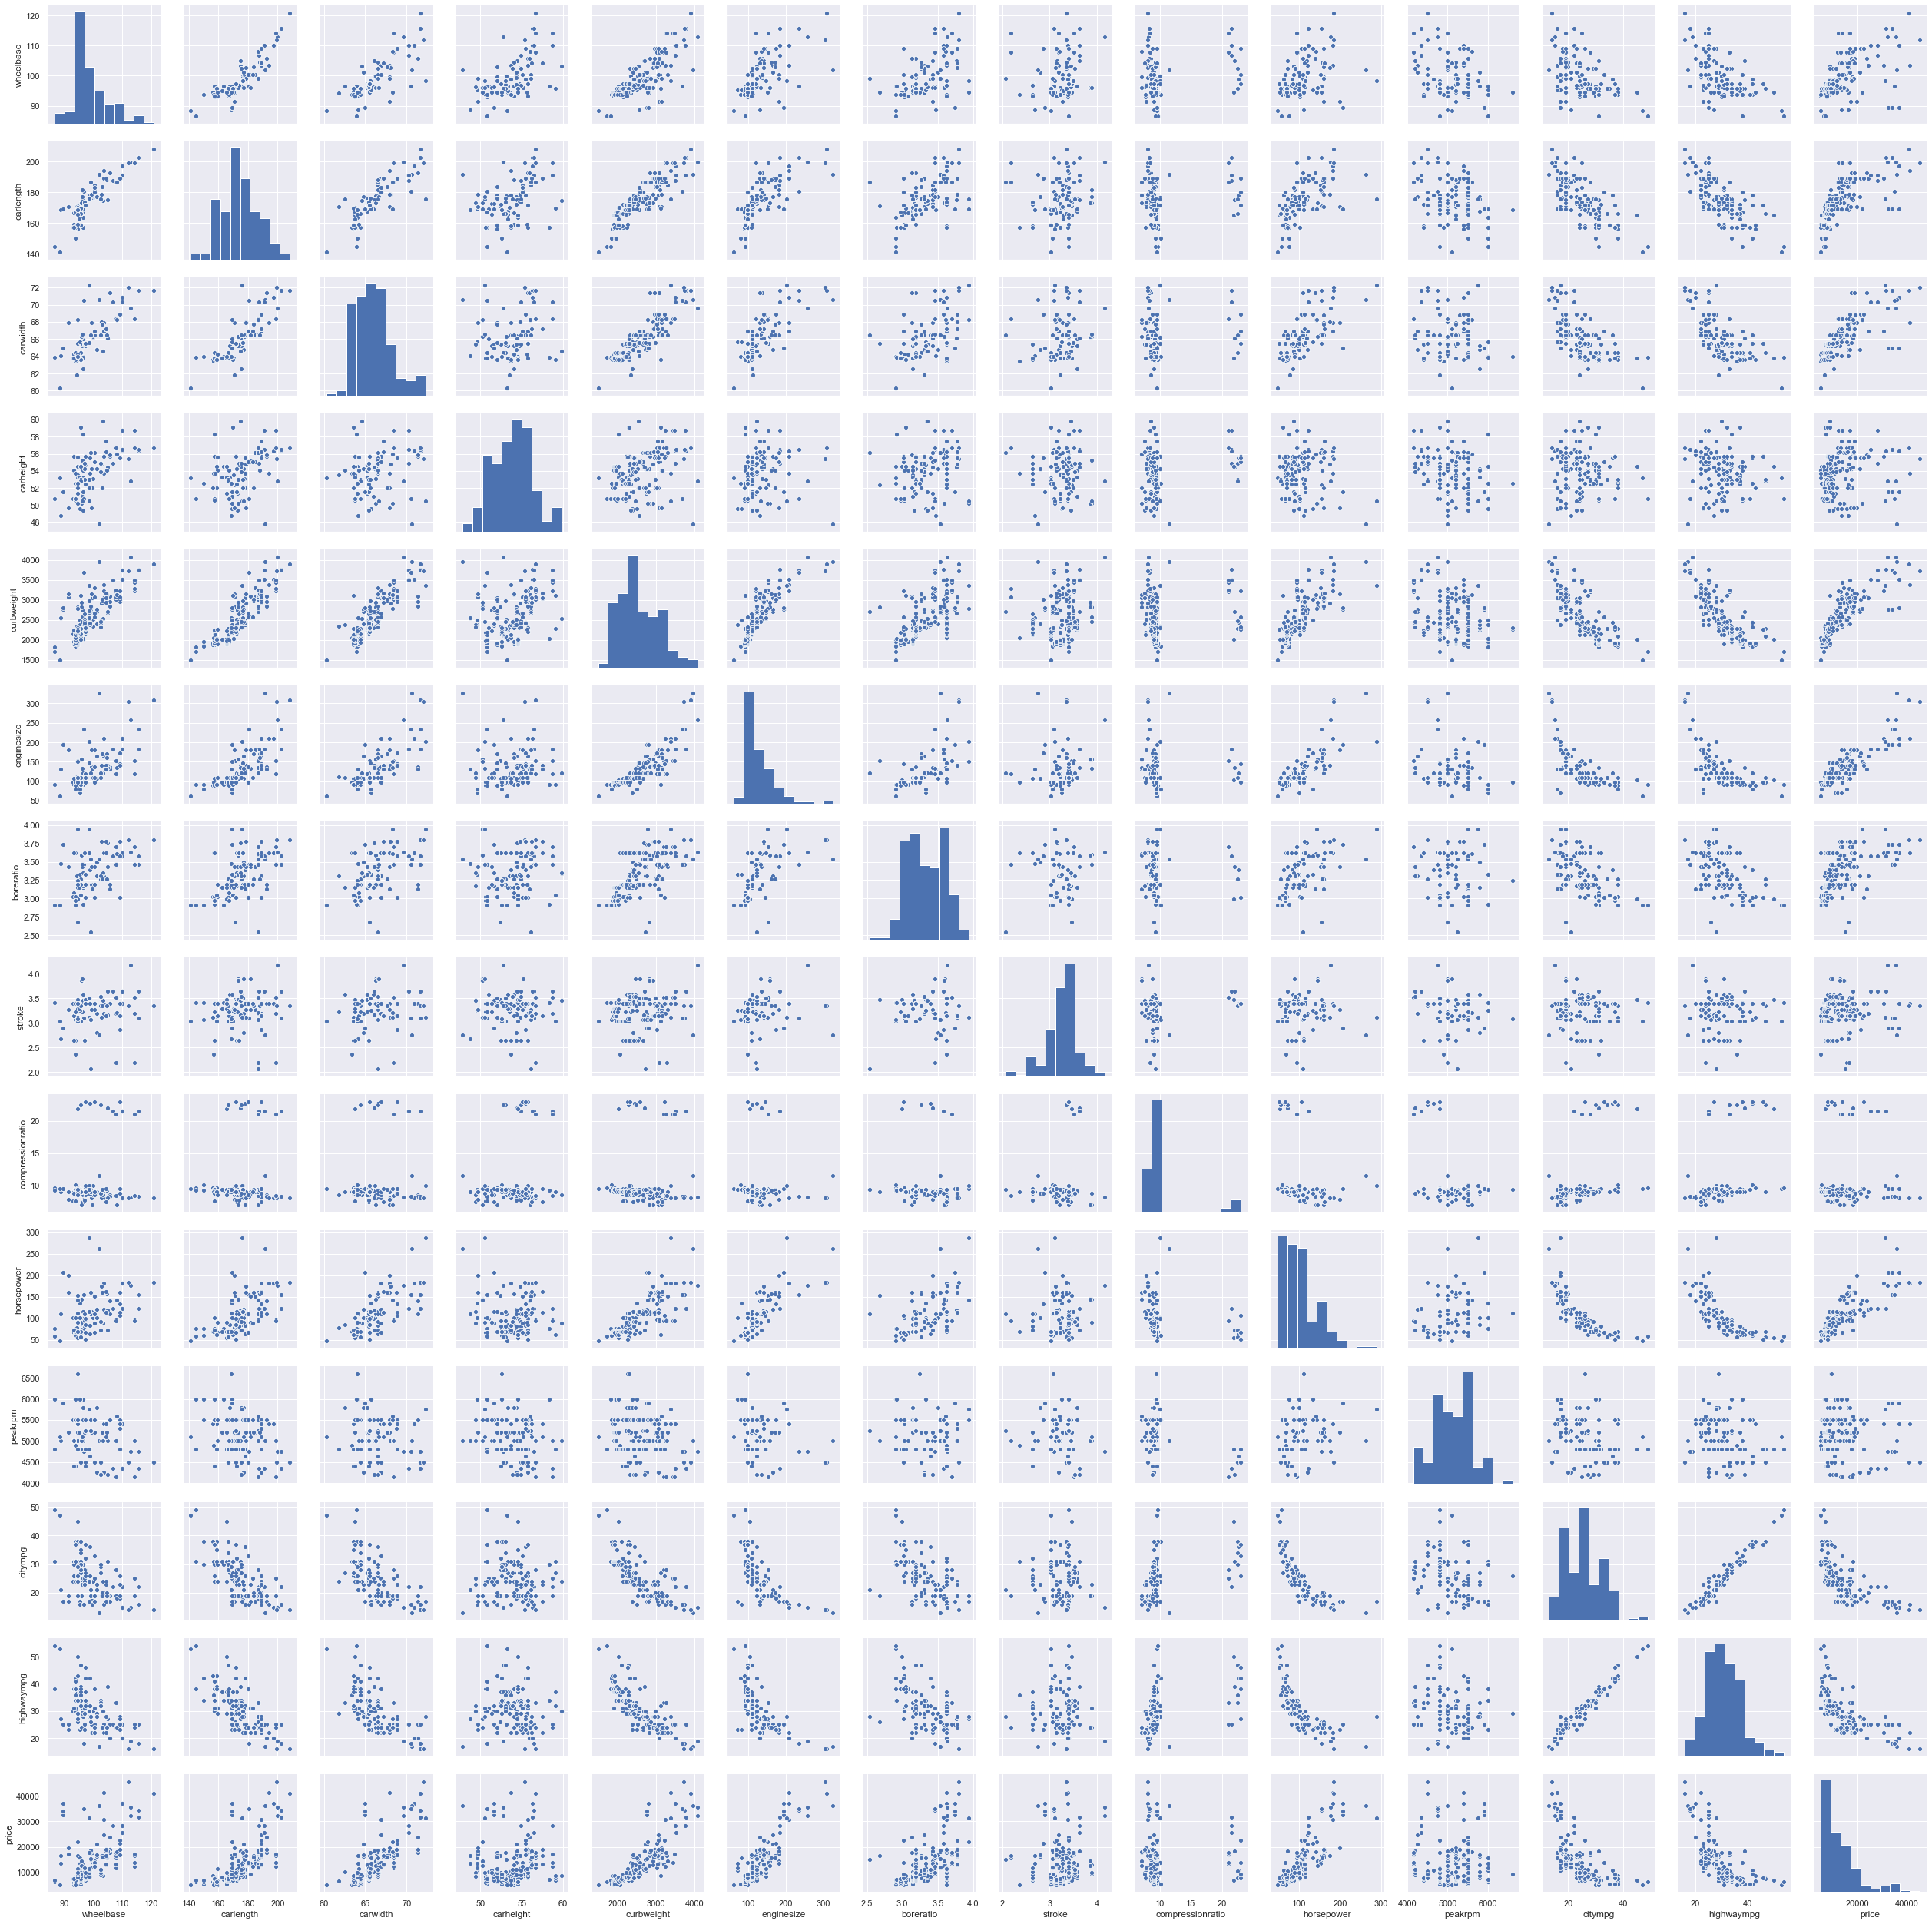

In [23]:
# Pairplot for all the numeric variables
ax = sns.pairplot(df_auto[num_col])

1)carlength, carwidth, curbweight ,enginesize ,horsepower seems to have a positive correlation with the output variable price.\
2)carheight doesn't show any significant trend with the output variable price.\
3)citympg, highwaympg seem to have a significant negative correlation with the output variable price.

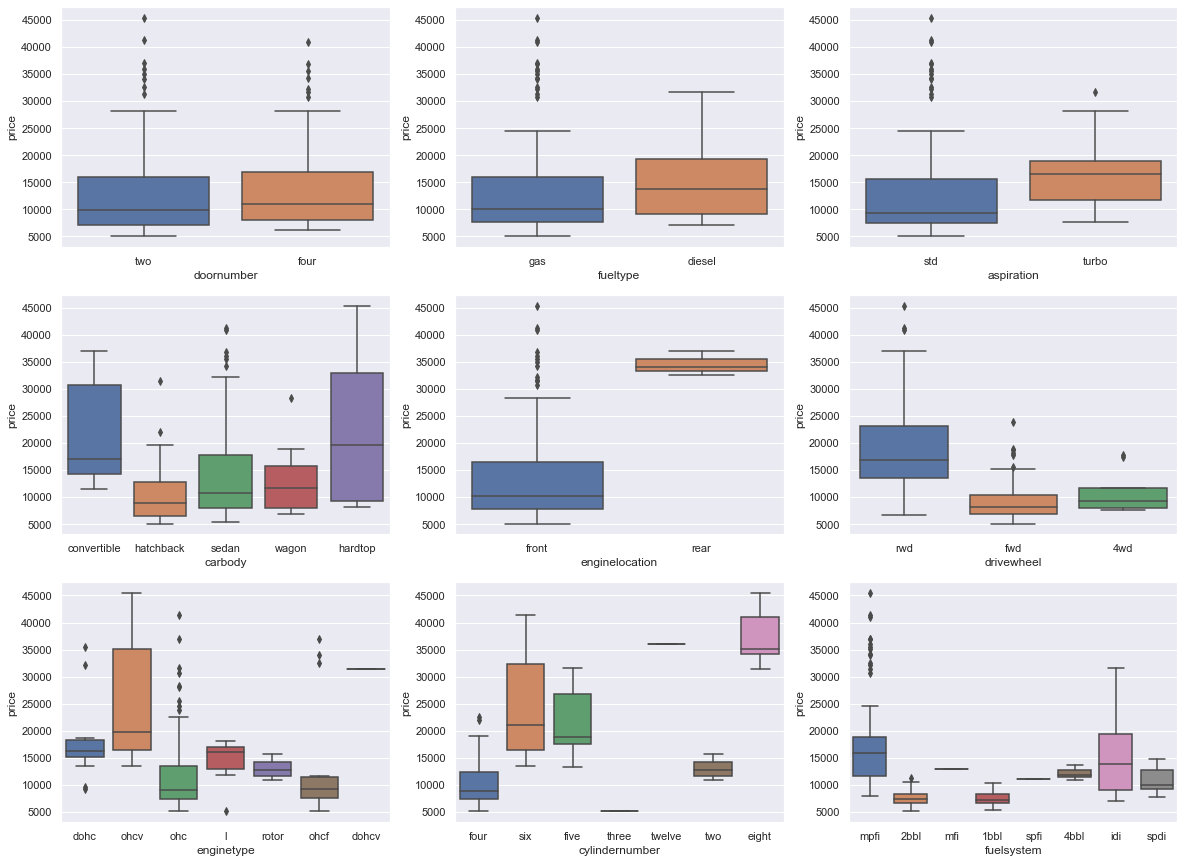

In [24]:
# Boxplot for all the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

1)DoorNumber isn't affecting the price much.\
2)The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.\
3)All the types of carbody is relatively cheaper as compared to hardtop,convertible carbody.\
4)The cars with rear enginelocation are way expensive than cars with front enginelocation.\
5)HigherEnd cars seems to have rwd drivewheel.\
6)Enginetype ohcv comes into higher price range cars.\
7)The price of car is directly proportional to no.of cylinders in most of the cases.

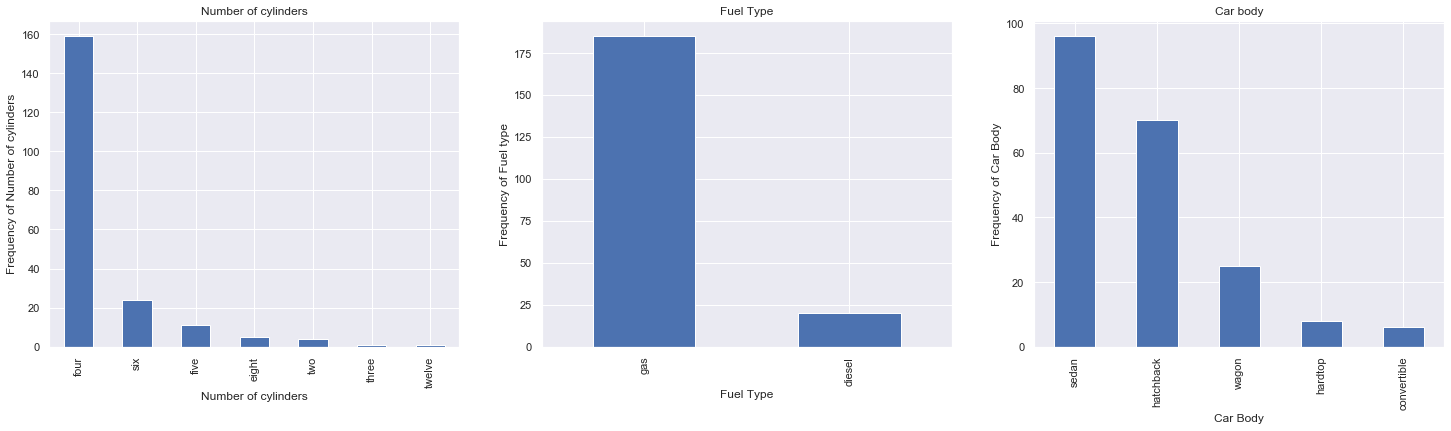

In [25]:
# Visualizing some more variables
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df_auto['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df_auto['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df_auto['carbody'].value_counts().plot('bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')
plt.show()

1)The number of cylinders used in most cars is four.\
2)Number of Gas fueled cars are way more than diesel fueled cars.\
3)Sedan is the most prefered car type.

#### Derived Metrics
We will use the mean of the car prices("Average Price") and visualize some variables using it.

<Figure size 3600x360 with 0 Axes>

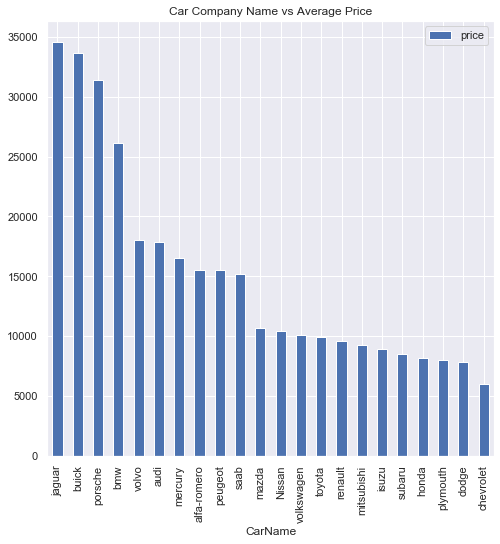

In [26]:
plt.figure(figsize=(50, 5))
df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

Jaguar,Buick and porsche seems to have the highest average price.

<Figure size 1440x432 with 0 Axes>

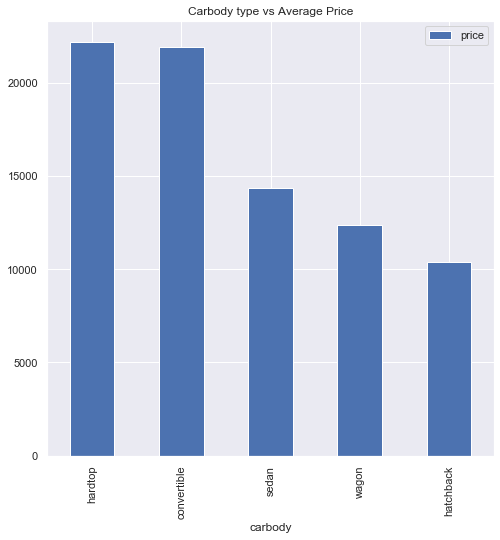

In [27]:
plt.figure(figsize=(20, 6))
df_autoy = pd.DataFrame(df_auto.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Carbody type vs Average Price')
plt.show()

hardtop and convertible seems to have the highest average price.

In [28]:
#Binning the Car Companies based on avg prices of each car Company using groupby and merge functions
df_auto['price'] = df_auto['price'].astype('int')
df_auto_temp = df_auto.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_auto['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


### Significant variables after Visualization
We find the follwing variables to be significant after all the visualizations\
Cars_Category , Engine Type, Fuel Type\
Car Body , Aspiration , Cylinder Number\
Drivewheel , Curbweight , Car Length,\
Car width , Engine Size,\
Boreratio , Horse Power , Wheel base\
citympg , highwaympg.

In [29]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
df_auto = df_auto[sig_col]

In [30]:
df_auto.shape

(205, 17)

### Data Preparation
#### Dummy Variables
We need to convert the categorical variables to numeric.For this, we will use something called dummy variables.

In [31]:
sig_cat_col = ['Cars_Category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel']

In [32]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
dummies = pd.get_dummies(df_auto[sig_cat_col])
dummies.shape

(205, 29)

In [33]:
# To get k-1 dummies out of k categorical levels by removing the first level.
dummies = pd.get_dummies(df_auto[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [34]:
# Add the results to the original dataframe
df_auto = pd.concat([df_auto, dummies], axis = 1)
df_auto.shape

(205, 39)

In [35]:
df_auto.sample(5)

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
85,6989,Budget_Friendly,ohc,gas,std,sedan,four,fwd,96.3000,2365,122,3.3500,88,25,32,172.4000,65.4000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
7,18920,Medium_Range,ohc,gas,std,wagon,five,fwd,105.8000,2954,136,3.1900,110,19,25,192.7000,71.4000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
146,7463,Budget_Friendly,ohcf,gas,std,wagon,four,fwd,97.0000,2290,108,3.6200,82,28,32,173.5000,65.4000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
123,8921,Budget_Friendly,ohc,gas,std,wagon,four,fwd,103.3000,2535,122,3.3500,88,24,30,174.6000,64.6000,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
185,8195,Medium_Range,ohc,gas,std,sedan,four,fwd,97.3000,2212,109,3.1900,85,27,34,171.7000,65.5000,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [36]:
# Drop the original cat variables as dummies are already created
df_auto.drop( sig_cat_col, axis = 1, inplace = True)
df_auto.shape

(205, 32)

## Splitting the Data into Training and Testing Sets

In [37]:
df_auto.sample(10)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
57,13645,95.3000,2385,70,3.3300,101,17,23,169.0000,65.7000,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1
104,17199,91.3000,3071,181,3.4300,160,19,25,170.7000,67.9000,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
107,11900,107.9000,3020,120,3.4600,97,19,24,186.7000,68.4000,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
85,6989,96.3000,2365,122,3.3500,88,25,32,172.4000,65.4000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
18,5151,88.4000,1488,61,2.9100,48,47,53,141.1000,60.3000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
8,23875,105.8000,3086,131,3.1300,140,17,20,192.7000,71.4000,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
30,6479,86.6000,1713,92,2.9100,58,49,54,144.6000,63.9000,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
197,16515,104.3000,3042,141,3.7800,114,24,28,188.8000,67.2000,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
127,34028,89.5000,2756,194,3.7400,207,17,25,168.9000,65.0000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
134,15040,99.1000,2707,121,2.5400,110,21,28,186.6000,66.5000,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [38]:
np.random.seed(0)
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_auto, test_size = 0.3, random_state = 100)
# We divide the dataframe into 70/30 ratio

In [39]:
print(df_train.shape)
print(df_test.shape)

(143, 32)
(62, 32)


### Rescaling the Features
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

1)Min-Max scaling\
2)Standardisation (mean-0, sigma-1)\
Here, we will use Standardisation Scaling.

In [40]:
scaler = preprocessing.StandardScaler()

In [41]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [42]:
# Apply scaler() to all the columns except the 'dummy' variables
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [43]:
df_train.sample(5)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
23,-0.6555,-0.8118,-0.7582,-0.6602,-1.0666,-0.0140,-0.2084,-0.1258,-1.2838,-0.9245,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
130,-0.4835,-0.4079,0.0728,0.1725,0.5867,-0.3171,-0.3581,0.0181,0.6439,0.2992,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
127,2.6957,-1.5188,0.3989,1.6909,1.6633,2.6387,-1.2565,-0.8453,-0.3598,-0.3806,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
22,-0.8586,-0.8118,-1.2225,-0.8562,-1.2973,-0.8729,0.8398,1.0254,-1.2838,-0.9245,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
82,-0.0549,-0.4415,0.5408,0.7603,1.0481,1.0724,-0.9570,-0.9892,-0.0173,0.2085,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0


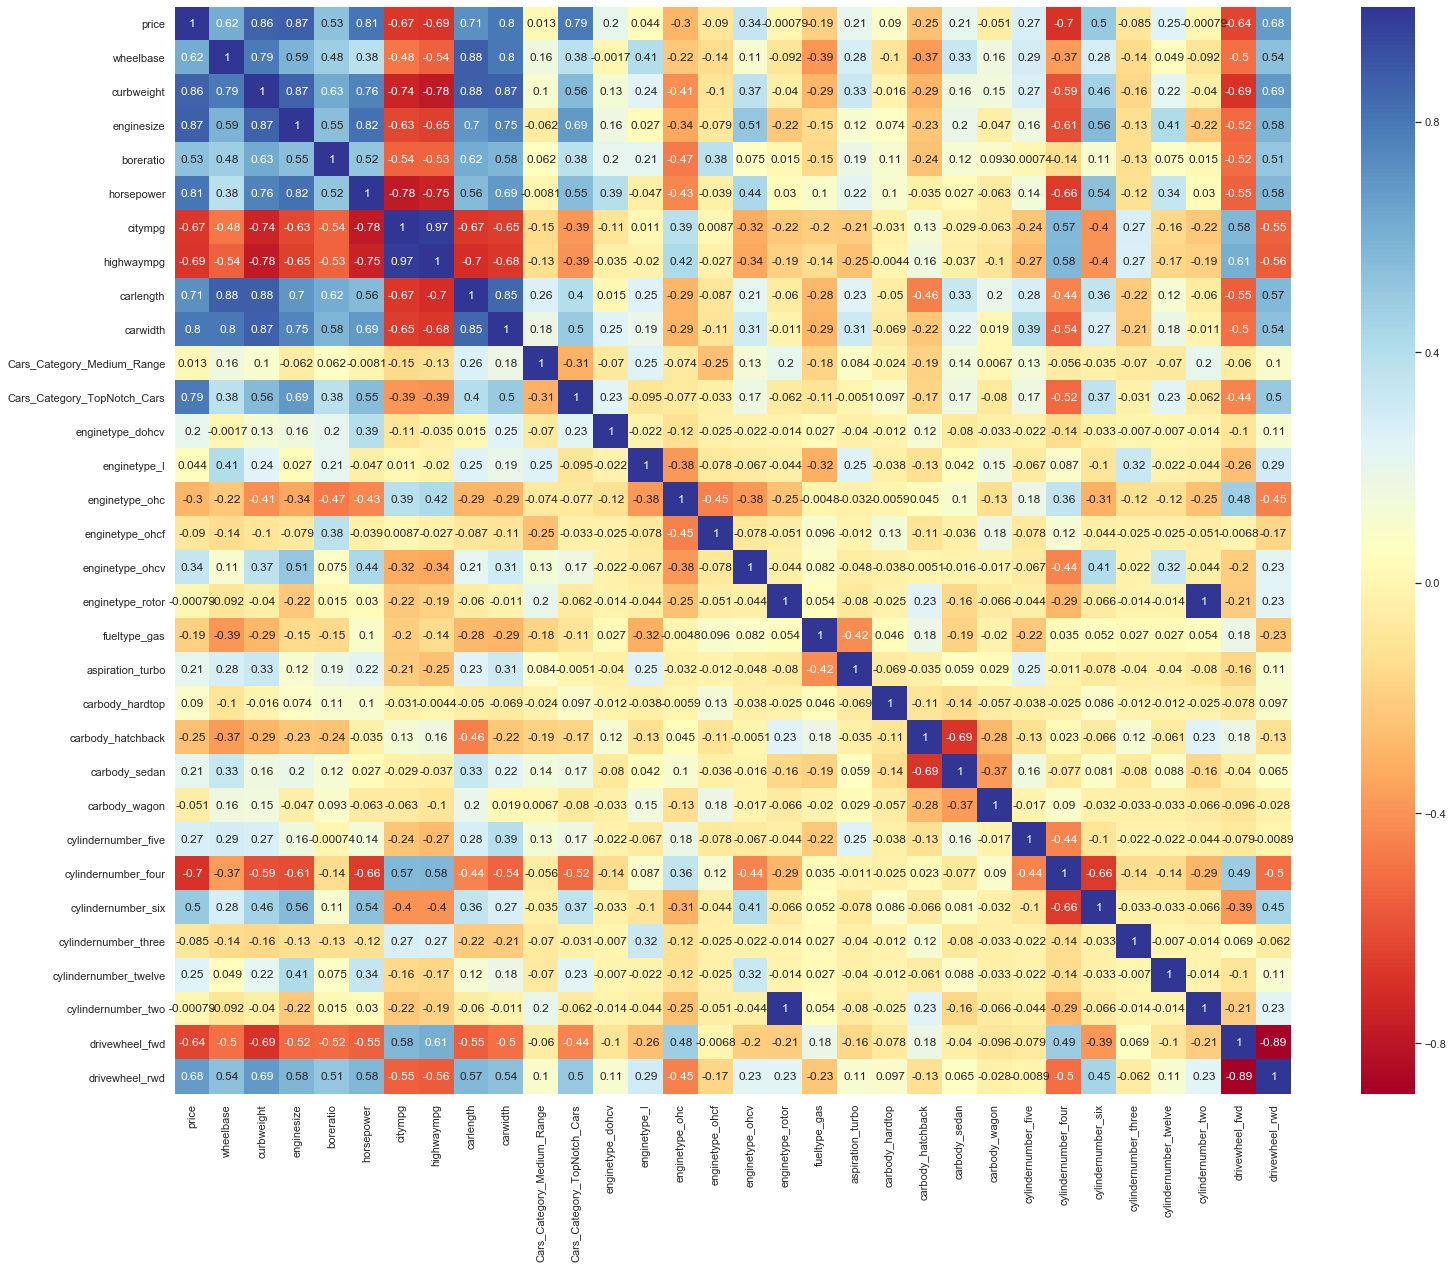

In [44]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), cmap="RdYlBu",annot=True)
plt.show()

From the above correlation heatmap we find that there a total of 13 variables which are highly correlated(both positively-9,negatively-4) with the price variable.

#### Scatterplot for few correlated variables vs price.

In [45]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

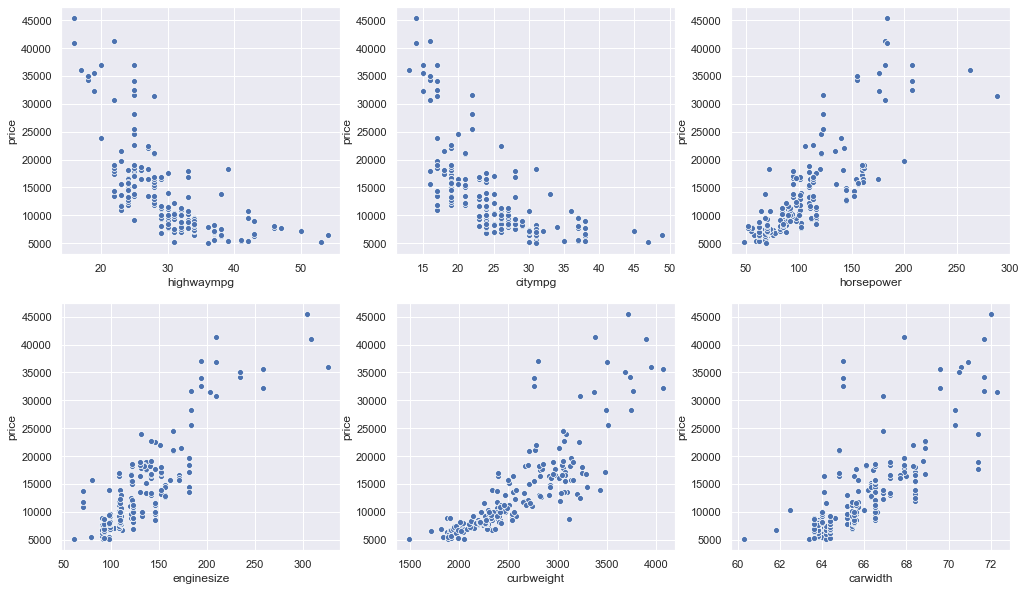

In [46]:
# Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=(17, 10))
plt.subplot(2,3,1)
sns.scatterplot(x = 'highwaympg', y = 'price', data = df_auto)
plt.subplot(2,3,2)
sns.scatterplot(x = 'citympg', y = 'price', data = df_auto)
plt.subplot(2,3,3)
sns.scatterplot(x = 'horsepower', y = 'price', data = df_auto)
plt.subplot(2,3,4)
sns.scatterplot(x = 'enginesize', y = 'price', data = df_auto)
plt.subplot(2,3,5)
sns.scatterplot(x = 'curbweight', y = 'price', data = df_auto)
plt.subplot(2,3,6)
sns.scatterplot(x = 'carwidth', y = 'price', data = df_auto)
plt.show()

We can see there is a line that we can fit in the above plots.

In [47]:
# Dividing into X and Y sets for model building
y_train = df_train.pop('price')
X_train = df_train

In [48]:
y_train.sample(2)

66   0.6797 
96   -0.7143
Name: price, dtype: float64

In [49]:
X_train.sample(2)

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
89,-0.6772,-1.1986,-0.6847,-0.6052,-0.8476,0.8398,0.8815,-0.6465,-0.9245,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
35,-0.3405,-0.9756,-0.8072,-1.5280,-0.6708,0.6900,0.4498,-0.7979,-0.8339,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [50]:
# Shapes of X_train,y_train
print(X_train.shape)
print(y_train.shape)

(143, 31)
(143,)


### Building a linear model

In [51]:
# Building a simple linear model with the most highly correlated variable enginesize
X_train_1 = X_train['enginesize']
# Add a constant
X_train_1c = sm.add_constant(X_train_1)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [52]:
# Check parameters created
lr_1.params

const        0.0000
enginesize   0.8679
dtype: float64

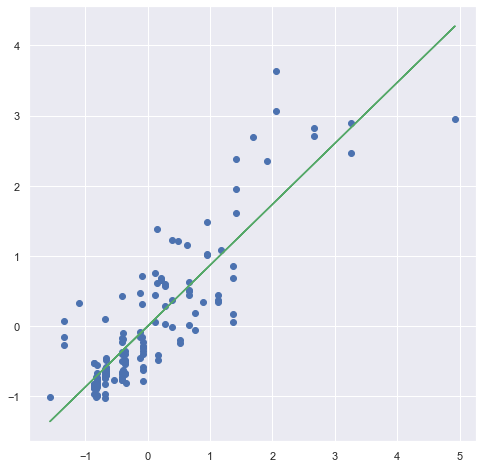

In [53]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8679*X_train_1c.iloc[:, 1], 'g')
plt.show()

In [54]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           1.09e-44
Time:                        13:09:05   Log-Likelihood:                -102.84
No. Observations:                 143   AIC:                             209.7
Df Residuals:                     141   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.042   2.07e-15      1.0

With simple linear regression i.e., enginesize and price we get adjusted R square value of 75%.

### Adding more variables
The adjusted R-squared value obtained is 0.75. Since we have so many variables,let's add the other highly correlated variables, i.e. curbweight,horsepower.

In [55]:
X_train_2 = X_train[['enginesize','horsepower', 'curbweight']]
# Add a constant
X_train_2c = sm.add_constant(X_train_2)
# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [56]:
lr_2.params

const        0.0000
enginesize   0.3400
horsepower   0.2288
curbweight   0.3938
dtype: float64

In [57]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           2.16e-51
Time:                        13:09:07   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.036    2.5e-15      1.0

The adjusted R-squared incresed from 0.75 to 0.81

### Considering all 13 correlated variables as from the correlation heatmap
The adjusted R-squared value obtained with 3 highly correlated variables is 0.81. Since we have so many correlated variables, we can clearly do better than this. So lets consider all the 13 highly correlated variables in order(from high to low), i.e.,(positively correlated-9) enginesize,curbweight,horsepower,carwidth,Cars_Category_TopNotch_Cars,carlength,drivewheel_rwd,(negatively correlated-4) drivewheel_fwd,cylindernumber_four,citympg,highwaympg and fit the multiple linear regression model.

In [58]:
X_train_3 = X_train[['enginesize', 'curbweight','horsepower', 'carwidth','Cars_Category_TopNotch_Cars','carlength','drivewheel_rwd','drivewheel_fwd','cylindernumber_four','citympg','highwaympg']]
# Add a constant
X_train_3c = sm.add_constant(X_train_3)
# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [59]:
lr_3.params

const                         0.0121 
enginesize                    0.0427 
curbweight                    0.1971 
horsepower                    0.1961 
carwidth                      0.1642 
Cars_Category_TopNotch_Cars   1.1336 
carlength                     0.0480 
drivewheel_rwd                0.1203 
drivewheel_fwd                -0.0262
cylindernumber_four           -0.2338
citympg                       0.0738 
highwaympg                    -0.0423
dtype: float64

In [60]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     134.8
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           8.62e-66
Time:                        13:09:09   Log-Likelihood:                -23.354
No. Observations:                 143   AIC:                             70.71
Df Residuals:                     131   BIC:                             106.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

We have achieved adjusted R-squared of 0.91 by manually picking the highly correlated variables.

### Making Predictions Using the Final Model
Now that we have fitted the model, it's time to go ahead and make predictions using the final model.

In [61]:
# Applying the scaling on the test sets
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

In [62]:
# Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [63]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_3c.columns]

In [64]:
# Making predictions using the final model
y_pred = lr_3.predict(X_test_new)

### Model Evaluation
Let's now plot the graph for actual versus predicted values.

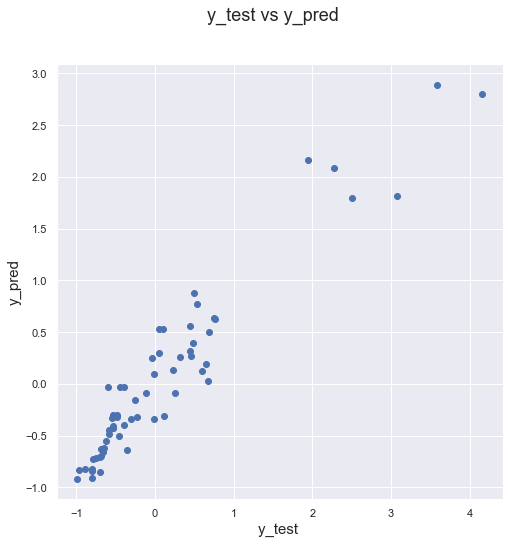

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)   
plt.xlabel('y_test ', fontsize=15)                       
plt.ylabel('y_pred', fontsize=15)    
plt.show()

### RMSE Score

In [66]:
r2_score(y_test, y_pred)

0.8926458920564233

The R2 score of Training set is 0.91 and Test set is 0.89 which is very much close. Hence, we can say that our model is good enough to predict the Car prices with the above variables.

### Equation of Line to predict the Car prices values
Carprice=0.0121+0.0427×enginesize+0.1971×curbweight+0.1961×horsepower+0.1642×carwidth+1.1336×Cars_Category_TopNotch+0.0480×carlength+0.1203×drivewheel_rwd-0.0262×drivewheel_fwd-0.2338×cylindernumber_four+0.0738×citympg-0.0423×highwaympg